Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [5]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


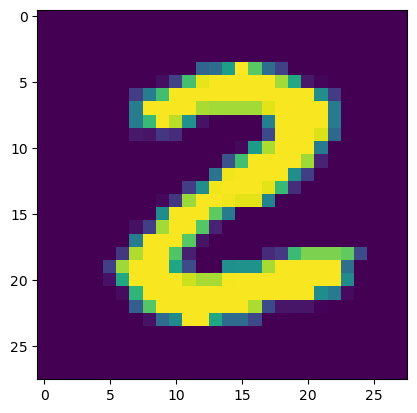

2


In [7]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image Lables

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Can also use One Hot Encoding

In [10]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [11]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer to flatten 28x28 images
    keras.layers.Dense(50, activation='relu'),  # First hidden layer
    keras.layers.Dense(50, activation='relu'),  # Second hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

C:\Users\Dmwin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 680us/step - accuracy: 0.8500 - loss: 0.5147
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.9562 - loss: 0.1461
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.9685 - loss: 0.1057
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9750 - loss: 0.0834
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.9790 - loss: 0.0690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9833 - loss: 0.0564
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.9858 - loss: 0.0477
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.9871 - loss: 0.0415
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.9889 - loss: 0.0357
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.9889 - loss: 0.0330


In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9669 - loss: 0.1299
0.97079998254776


In [16]:
print(X_test.shape)

(10000, 28, 28)


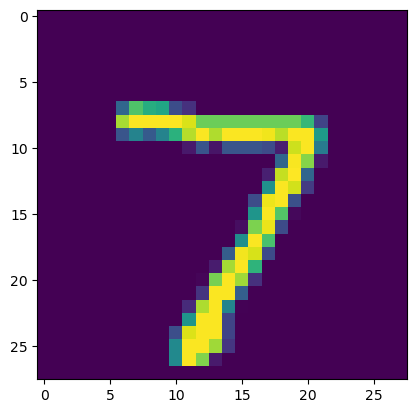

In [17]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[1.6297957e-07 3.7025143e-11 5.6895692e-06 2.1172207e-04 2.0004732e-13
 1.0068405e-08 3.4098989e-20 9.9977928e-01 9.1733213e-08 3.1003672e-06]


In [22]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [23]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 2, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusin Matrix

In [24]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 958    0    2    1    1    3    4    2    3    6]
 [   0 1121    2    3    0    2    3    0    4    0]
 [   2    1  996   13    5    0    1    9    5    0]
 [   0    0    4  994    0    1    0    4    5    2]
 [   0    0    3    0  970    0    3    2    1    3]
 [   1    0    1   20    3  851    4    0    9    3]
 [   4    2    3    0    5    4  939    0    1    0]
 [   1    2    7    8    4    0    0  990    5   11]
 [   3    2    2   13    6    4    9    3  930    2]
 [   1    4    0    8   24    1    0    7    5  959]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

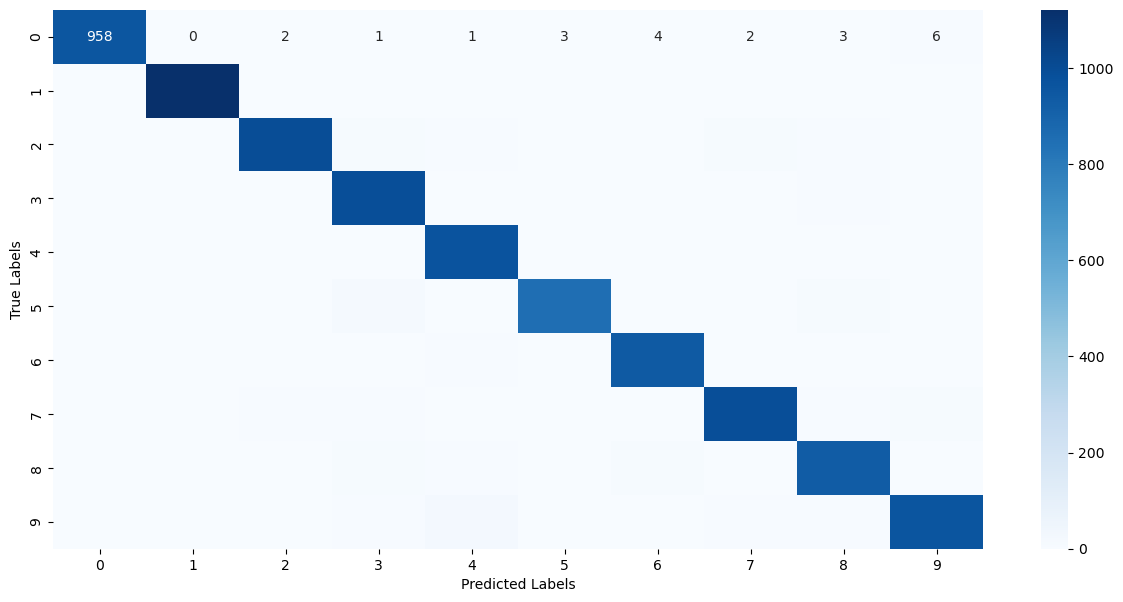

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [27]:
input_image_path = "C:/Users/Dmwin/OneDrive/Desktop/Screenshot_1.png"

input_image = cv2.imread(input_image_path)

In [28]:
type(input_image)

numpy.ndarray

In [29]:
print(input_image)

[[[202 202 202]
  [192 192 192]
  [195 195 195]
  ...
  [195 195 195]
  [195 195 195]
  [195 195 195]]

 [[ 65  65  65]
  [ 11   0   9]
  [ 16   0  13]
  ...
  [ 16   0  13]
  [ 16   0  13]
  [ 15   0  12]]

 [[ 68  68  68]
  [ 55   0  44]
  [ 78   0  63]
  ...
  [ 80   0  64]
  [ 80   0  64]
  [ 75   0  61]]

 ...

 [[ 68  68  68]
  [ 58   0  47]
  [ 82   0  67]
  ...
  [ 84   1  68]
  [ 84   1  68]
  [ 79   0  64]]

 [[ 68  68  68]
  [ 58   0  47]
  [ 82   0  67]
  ...
  [ 84   1  68]
  [ 84   1  68]
  [ 79   0  64]]

 [[ 68  68  68]
  [ 56   0  46]
  [ 81   0  65]
  ...
  [ 82   0  66]
  [ 82   0  66]
  [ 78   0  63]]]


In [30]:
input_image

array([[[202, 202, 202],
        [192, 192, 192],
        [195, 195, 195],
        ...,
        [195, 195, 195],
        [195, 195, 195],
        [195, 195, 195]],

       [[ 65,  65,  65],
        [ 11,   0,   9],
        [ 16,   0,  13],
        ...,
        [ 16,   0,  13],
        [ 16,   0,  13],
        [ 15,   0,  12]],

       [[ 68,  68,  68],
        [ 55,   0,  44],
        [ 78,   0,  63],
        ...,
        [ 80,   0,  64],
        [ 80,   0,  64],
        [ 75,   0,  61]],

       ...,

       [[ 68,  68,  68],
        [ 58,   0,  47],
        [ 82,   0,  67],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 79,   0,  64]],

       [[ 68,  68,  68],
        [ 58,   0,  47],
        [ 82,   0,  67],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 79,   0,  64]],

       [[ 68,  68,  68],
        [ 56,   0,  46],
        [ 81,   0,  65],
        ...,
        [ 82,   0,  66],
        [ 82,   0,  66],
        [ 78,   0,  63]]

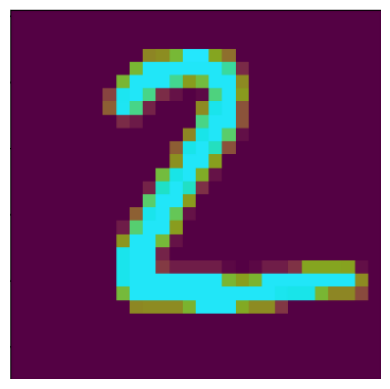

In [31]:
plt.imshow(input_image)
plt.axis('off')  # Turn off axis for better visualization
plt.show()

In [32]:
input_image.shape

(362, 363, 3)

In [33]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(362, 363)

In [35]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [36]:
input_image_resize.shape

(28, 28)

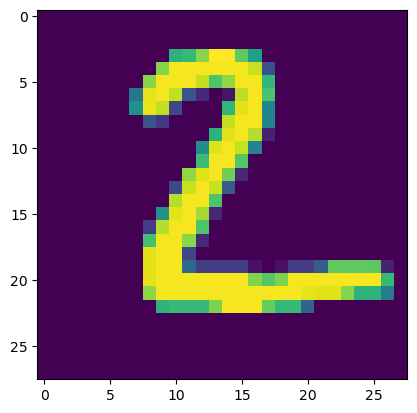

In [37]:
plt.imshow(input_image_resize)

In [38]:
input_image_resize = input_image_resize/255

In [39]:
type(input_image_resize)

numpy.ndarray

In [40]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [41]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[8.9881226e-08 8.0166132e-07 9.2734694e-01 7.2651878e-02 1.3846837e-20
  2.3920373e-07 1.2821737e-11 3.4735909e-10 4.4900221e-09 5.0100576e-14]]


In [42]:
input_pred_label = np.argmax(input_prediction)

In [43]:
print(input_pred_label)

2


Path of the image to be predicted:  C:/Users/Dmwin/OneDrive/Desktop/Screenshot_1.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
The Handwritten Digit is recognised as  2


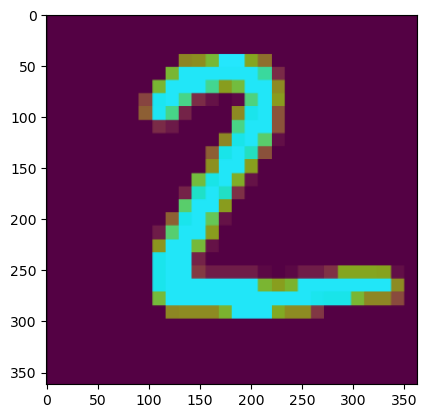

In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)